In [1]:
import sys
sys.path.append('modules/')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from importlib import reload
sns.set_style('white')
import glob
import matplotlib
import figures as fg
import general as gn
from itertools import repeat
import math
import matplotlib as mpl
import statsmodels.api as sm
import scikit_posthocs as sp
%config InlineBackend.figure_format='retina'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import scipy
from collections import defaultdict
from collections import defaultdict
import matplotlib.patheffects as pe
from Bio import motifs 
pseudocounts={'A':1-0.3829736683443062, 'C': 0.3829736683443062, 'G': 0.3829736683443062, 'T': 1-0.3829736683443062}
background={'A':(1-0.3829736683443062)/2, 'C': 0.3829736683443062/2, 'G': 0.3829736683443062/2, 'T': (1-0.3829736683443062)/2}
import logomaker


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [3]:
data = pd.read_pickle('data/averaged_chec_sumprom.gz')
TFS = ['Msn2', 'Gal4', 'Gcn4', 'Yap1', 'Mig3', 'Gln3', 'Rpn4']

gp = pd.read_csv('data/geneinfo_params.csv', index_col=0)
aro_targets = np.array([1302,6541,4730,4729,2603,2604])
aro_targets = gp.iloc[aro_targets-1].index
data_check = data.rename(columns={'Gal4DBD_Gal4AD_dGal4_deletions_tef_3_reps_0.95_meancorr': 'Gal4DBD_Gcn4AD_dGal4_deletions_tef_3_reps_0.97_meancorr',
                                     'Gal4DBD_Gcn4AD_dGal4_deletions_tef_3_reps_0.97_meancorr':'Gal4DBD_Gal4AD_dGal4_deletions_tef_3_reps_0.95_meancorr'})
data_waro = data
data_waro = data_waro.rename(columns={'Gal4DBD_Gal4AD_dGal4_deletions_tef_3_reps_0.95_meancorr': 'Gal4DBD_Gcn4AD_dGal4_deletions_tef_3_reps_0.97_meancorr',
                                     'Gal4DBD_Gcn4AD_dGal4_deletions_tef_3_reps_0.97_meancorr':'Gal4DBD_Gal4AD_dGal4_deletions_tef_3_reps_0.95_meancorr'})

data_check = data.drop(aro_targets)

In [4]:
import general_figures as gn1

opn = pd.read_csv('data/external_datasets/opn_mine.csv', index_col=0)
opn.loc[np.isinf(opn.loc[:, 'opn_score']).values, 'opn_score'] = math.nan
opn = gn1.prepare_opn(opn)


# Single promoter tracks

In [5]:
genes_needed =['GAL7', 'LEU4','STF2', 'YNL134C', 'MTH1']
titles = ['Gal4Full',
 'Gal4DBD_Gal4AD',
 'Gal4DBD_Gcn4AD',
 'Gcn4Full',
 'Gcn4DBD_Gal4AD',
 'Gcn4DBD_Gcn4AD',
 'Msn2Full',
 'Msn2DBD_Gal4AD',
 'Msn2DBD_Gcn4AD',
 'Yap1Full',
 'Yap1DBD_Gal4AD',
 'Yap1DBD_Gcn4AD',
 'Mig3Full',
 'Mig3DBD_Gal4AD',
 'Mig3DBD_Gcn4AD']

In [6]:
sp_dat = gn.get_zscored(data_waro.filter(regex='deletions', axis=1).filter(regex='^'.join(['Gal4|', 'Gcn4|', 'Yap1|', 'Mig3|', 'Msn2'])))

In [7]:
targets = fg.get_targets_df(data_waro, 3, 't', '', '').filter(regex='deletions', axis=0).filter(regex='^'.join(['Gal4|', 'Gcn4|', 'Yap1|', 'Mig3|', 'Msn2']), axis=0)

# Tracks for Supp

In [8]:
import pickle
with open('data/nuc_struct.pkl', 'rb') as f:
    nucchr = pd.DataFrame(pickle.load(f))

In [9]:
norm_tracks = pd.read_pickle('data/normalized_s1_tracks_data.gz')

/tmp/ipykernel_68112/3736067087.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


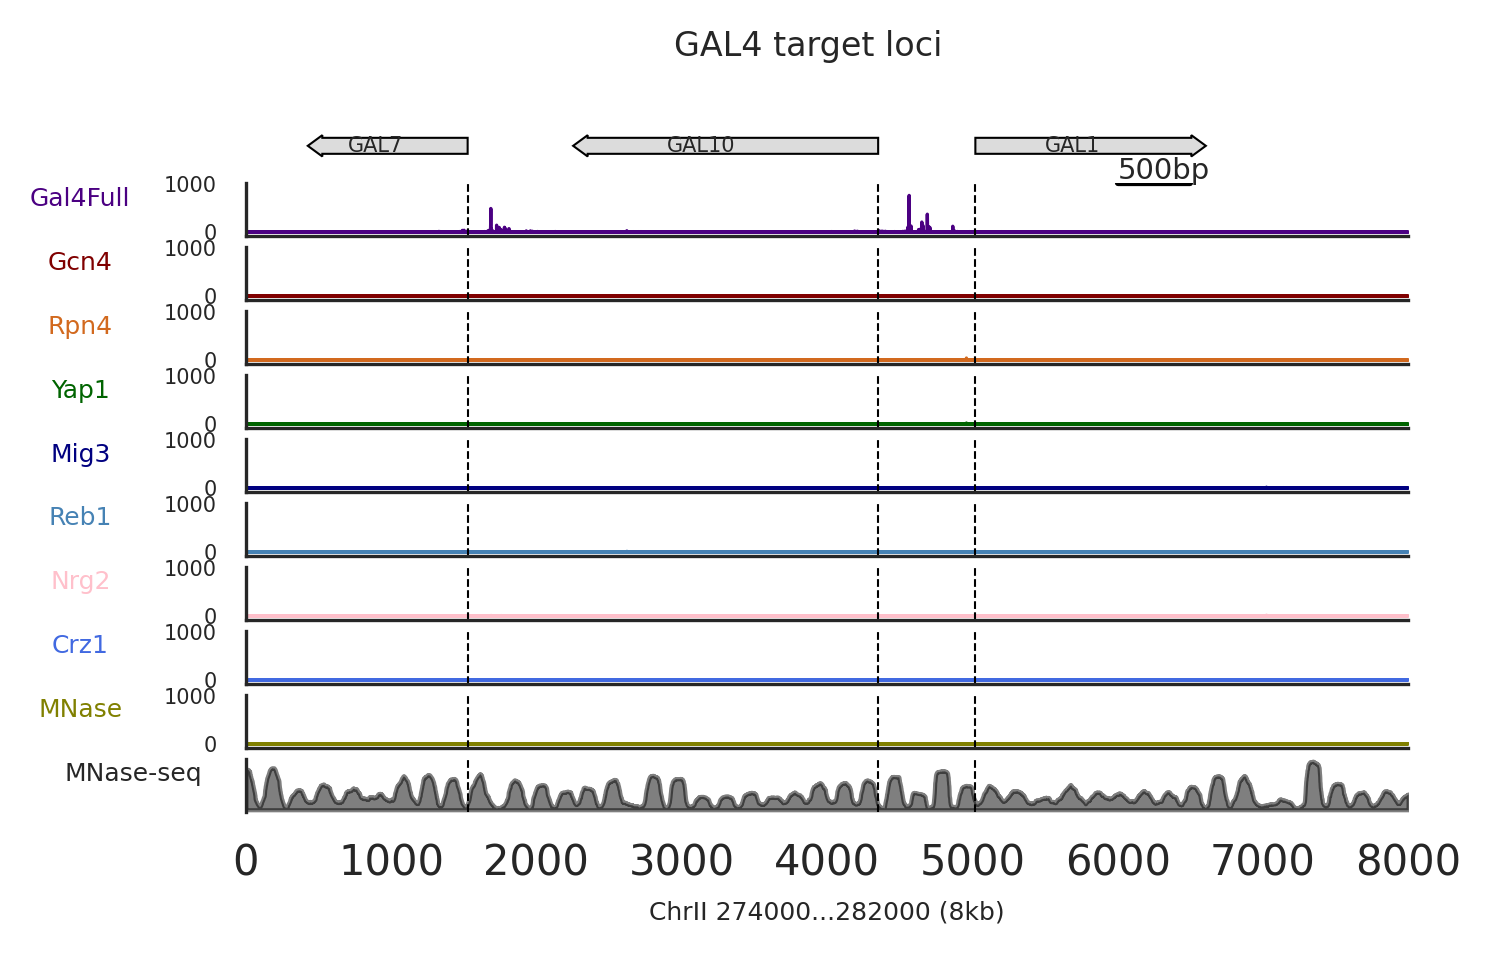

In [10]:
tracks = norm_tracks.loc[2].apply(lambda x: x[274000:282000])
fig, ax = plt.subplots(tracks.shape[0]+2,1, constrained_layout=False, sharex=True, sharey=False, dpi=150, figsize=(5,3))
fig.suptitle('GAL4 target loci', size=8)

colors = ['indigo', 'maroon', 'chocolate', 'darkgreen', 'navy', 'steelblue', 'pink', 'royalblue', 'olive']
for tfi, axi, colori in zip(['Gal4Full_erv', 'Gcn4_lown', 'Rpn4','Yap1','Mig3','Reb1', 'Nrg2', 'Crz1', 'MNase'], ax[1:], colors):
    plot_vec = tracks.loc[tfi]
    axi.fill_between(np.arange(plot_vec.shape[0]), plot_vec,color=colori,lw=.8)
    axi.set_xlim([0, 8000])
    axi.set_ylim([-100,1000])
    sns.despine(ax=axi, top=True, right=True)
    axi.set_ylabel(tfi.split('_')[0], size=6, rotation=0, labelpad=20)
    axi.yaxis.label.set_color(colori)    
    axi.set_yticklabels(axi.get_yticklabels(), size=5)
    
    axi.axvline(1527, c='k', linestyle='--', lw=.5)
    axi.axvline(4352, c='k', linestyle='--', lw=.5)
    axi.axvline(5021, c='k', linestyle='--', lw=.5)
ax[0].set_ylim([0, 2])
hw = .8
hl = 100
wd = .6
ya = 1
ax[0].arrow(1527, ya, -(1527-427-hl),0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
ax[0].arrow(4352, ya, -(4352-2253-hl),0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
ax[0].arrow(5021, ya, (6607-5021-hl),0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
ax[0].set_yticklabels('')

texty = .8
ax[0].text(700, texty, 'GAL7', size=5)
ax[0].text(2900, texty, 'GAL10', size=5)
ax[0].text(5500, texty, 'GAL1', size=5)

sns.despine(ax=ax[0], top=True, right=True, bottom=True, left=True)

ax[-1].fill_between(range(8000), nucchr.loc[2].apply(lambda x: x[274000:282000]).values[0], color='k', alpha=.5, edgecolor='k')
ax[-1].set_yticklabels('')
ax[-1].set_ylabel('MNase-seq', size=6, rotation=0, labelpad=20)
ax[-1].axvline(1527, c='k', linestyle='--', lw=.5)
ax[-1].axvline(4352, c='k', linestyle='--', lw=.5)
ax[-1].axvline(5021, c='k', linestyle='--', lw=.5)
sns.despine(ax=ax[-1], top=True, right=True, bottom=True)

fig.subplots_adjust(hspace=0.2)

ax[1].plot([6000,6500],[1000,1000], c='k')
ax[1].text(6000, 1100, '500bp', size=7)

ax[-1].set_xlabel('ChrII 274000...282000 (8kb)', size=6)

fig.savefig('figures/Supp/S1_1.pdf')

/tmp/ipykernel_68112/2215138539.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


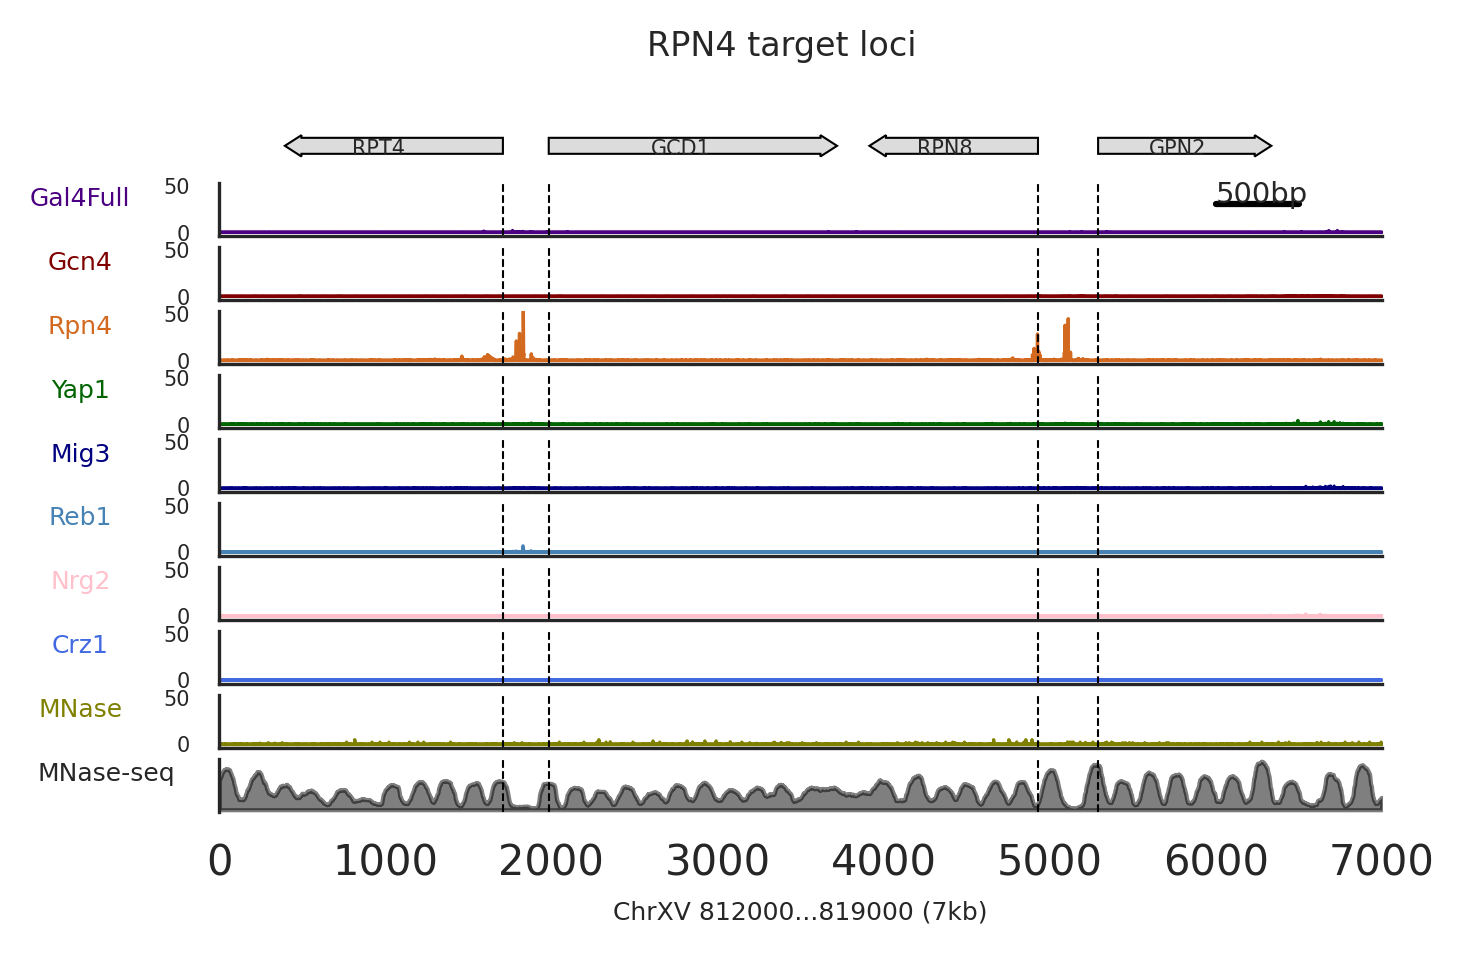

In [11]:

tracks = norm_tracks.loc[15].apply(lambda x: x[812000:819000])
fig, ax = plt.subplots(tracks.shape[0]+2,1, constrained_layout=False, sharex=True, sharey=False, dpi=150, figsize=(5,3))
fig.suptitle('RPN4 target loci', size=8)

colors = ['indigo', 'maroon', 'chocolate', 'darkgreen', 'navy', 'steelblue', 'pink', 'royalblue', 'olive']
for tfi, axi, colori in zip(['Gal4Full_erv', 'Gcn4_lown', 'Rpn4','Yap1','Mig3','Reb1', 'Nrg2', 'Crz1', 'MNase'], ax[1:], colors):
    plot_vec = tracks.loc[tfi]
    axi.fill_between(np.arange(plot_vec.shape[0]), plot_vec,color=colori,lw=.8)
    sns.despine(ax=axi, top=True, right=True)
    axi.set_ylabel(tfi.split('_')[0], size=6, rotation=0, labelpad=20)
    axi.yaxis.label.set_color(colori)
    axi.set_xlim([0,7e3])
    axi.set_ylim([-5,52])
    axi.set_yticklabels(axi.get_yticklabels(), size=5)

    axi.axvline(1707, c='k', linestyle='--', lw=.5)
    axi.axvline(1983, c='k', linestyle='--', lw=.5)
    axi.axvline(4930, c='k', linestyle='--', lw=.5)
    axi.axvline(5292, c='k', linestyle='--', lw=.5)

ax[0].set_ylim([0, 2])
hw = .8
hl = 100
wd = .6
ya = 1
ax[0].arrow(1708, ya, -(1708-395-hl),0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
ax[0].arrow(1984, ya, (3720-1984-hl),0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
ax[0].arrow(4930, ya, -(4930-3915-hl),0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
ax[0].arrow(5292, ya, (6335-5292-hl),0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)

ax[0].set_yticklabels('')

texty = .7
ax[0].text(800, texty, 'RPT4', size=5)
ax[0].text(2600, texty, 'GCD1', size=5)
ax[0].text(4200, texty, 'RPN8', size=5)
ax[0].text(5600, texty, 'GPN2', size=5)

sns.despine(ax=ax[0], top=True, right=True, bottom=True, left=True)

ax[-1].fill_between(range(7000), nucchr.loc[15].apply(lambda x: x[812000:819000]).values[0], color='k', alpha=.5, edgecolor='k')
ax[-1].set_yticklabels('')
ax[-1].set_ylabel('MNase-seq', size=6, rotation=0, labelpad=20)
ax[-1].axvline(1707, c='k', linestyle='--', lw=.5)
ax[-1].axvline(1983, c='k', linestyle='--', lw=.5)
ax[-1].axvline(4930, c='k', linestyle='--', lw=.5)
ax[-1].axvline(5292, c='k', linestyle='--', lw=.5)
sns.despine(ax=ax[-1], top=True, right=True, bottom=True)

fig.subplots_adjust(hspace=0.2)

ax[1].plot([6000,6500],[30,30], c='k')
ax[1].text(6000, 32, '500bp', size=7)

ax[-1].set_xlabel('ChrXV 812000...819000 (7kb)', size=6)

fig.savefig('figures/Supp/S1_2.pdf')

In [12]:
def draw_arrow(ax, coords, hw, hl, wd, ya,s, text):
    start = coords[0]
    stop = coords[1]
    if (start-stop) > 0:
        ax.arrow(start, ya, -(start-stop)+hl,0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
    else:
        ax.arrow(start, ya, (stop-start)-hl,0, head_width=hw, head_length=hl, width=wd, fc='gainsboro', ec='black', lw=.5)
    ax.text((min(start,stop)+np.abs(stop-start)/4), ya, text, size=s)

def draw_line(ax, coord, c='k', lw=.5, ls='--'):
    ax.axvline(coord, c=c, lw=lw, ls=ls)

In [13]:
gp = pd.read_csv('data/geneinfo_params.csv', index_col=0)


/tmp/ipykernel_68112/1710906703.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


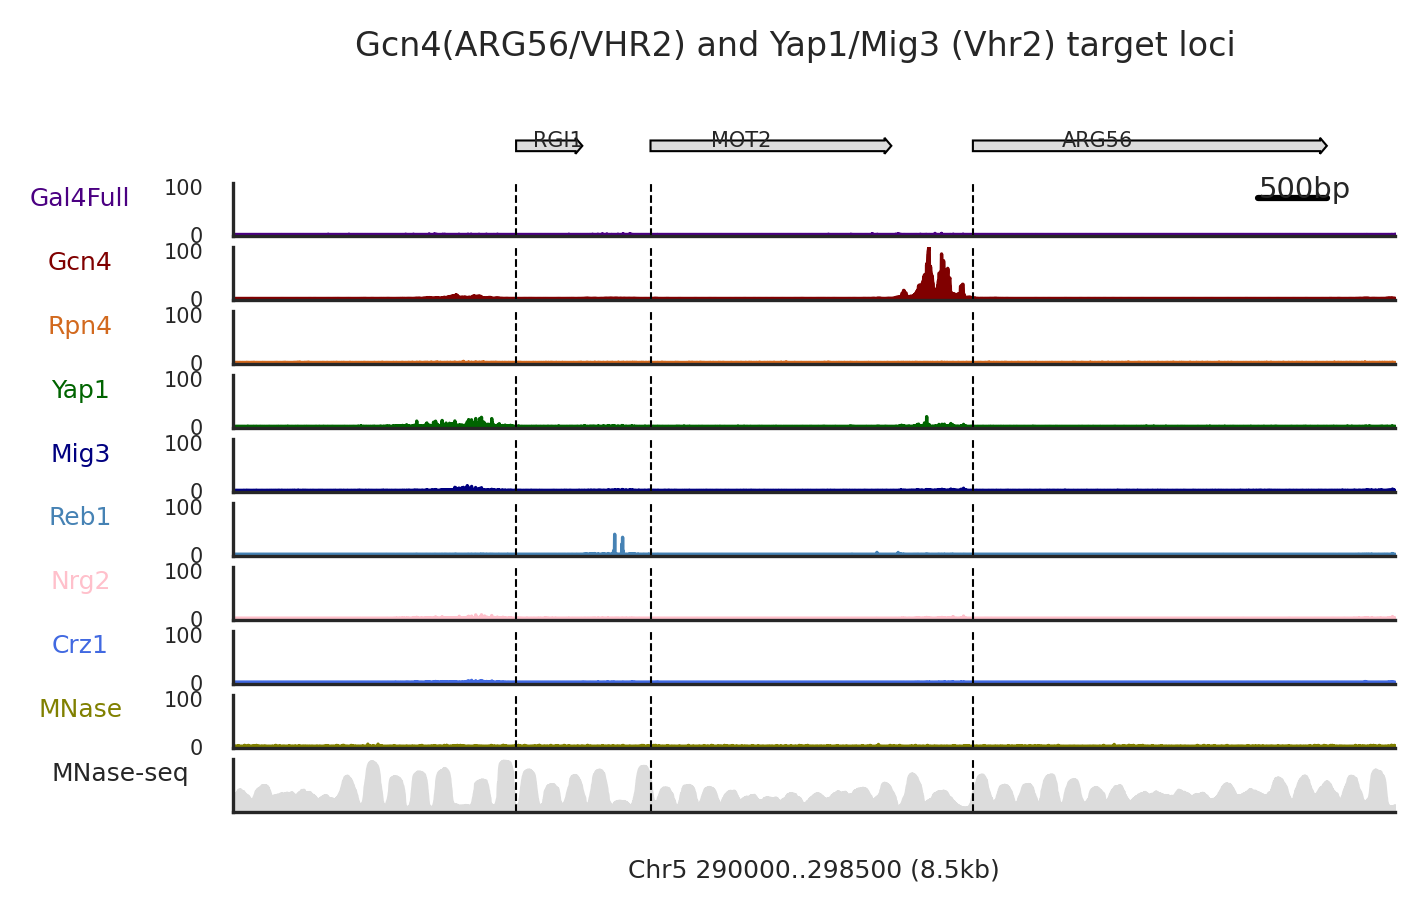

In [14]:
chrom = 5
startchr = 290000
stopchr = 298500
gcn4coords = (gp.query("chr_loc==@chrom & start>@startchr & stop<@stopchr & status=='Verified ORF'").loc[:, ['start', 'stop']].applymap(lambda x: int(x)) - startchr).clip(0)


tracks = norm_tracks.loc[chrom].apply(lambda x: x[startchr:stopchr])
fig, ax = plt.subplots(tracks.shape[0]+2,1, constrained_layout=False, sharex=True, sharey=False, dpi=150, figsize=(5,3))
fig.suptitle('Gcn4(ARG56/VHR2) and Yap1/Mig3 (Vhr2) target loci', size=8)

colors = ['indigo', 'maroon', 'chocolate', 'darkgreen', 'navy', 'steelblue', 'pink', 'royalblue', 'olive']
for tfi, axi, colori in zip(['Gal4Full_erv', 'Gcn4_lown', 'Rpn4','Yap1','Mig3','Reb1', 'Nrg2', 'Crz1', 'MNase'], ax[1:], colors):
    plot_vec = tracks.loc[tfi]
    axi.fill_between(np.arange(plot_vec.shape[0]), plot_vec,color=colori,lw=.8)
    sns.despine(ax=axi, top=True, right=True)
    axi.set_ylabel(tfi.split('_')[0], size=6, rotation=0, labelpad=20)
    axi.yaxis.label.set_color(colori)
    axi.set_xlim([-10,stopchr-startchr])
    axi.set_ylim([-5, max(tracks.apply(lambda x: max(x)))])
    axi.set_yticklabels(axi.get_yticklabels(), size=5)

ax[0].set_ylim([0, 100])
hw = 30
hl = 50
wd = 20
ya = 50
ts = 5
for i in range(gcn4coords.shape[0]):
    text = gcn4coords.index[i]
    draw_arrow(ax[0], gcn4coords.values[i], hw, hl, wd, ya, ts, text)
    for axi in ax[1:]:
        draw_line(axi, gcn4coords.values[i][0])


ax[0].set_yticklabels('')
sns.despine(ax=ax[0], top=True, right=True, bottom=True, left=True)


ax[-1].fill_between(range(stopchr-startchr), nucchr.loc[chrom].apply(lambda x: x[startchr:stopchr]).values[0], color='gainsboro')
ax[-1].set_yticklabels('')
ax[-1].set_ylabel('MNase-seq', size=6, rotation=0, labelpad=20)
ax[-1].set_xticklabels('')
sns.despine(ax=ax[-1], top=True, right=True, bottom=False)
fig.subplots_adjust(hspace=0.2)

y = max(tracks.apply(lambda x: max(x))) * 0.7
ax[1].plot([(stopchr-startchr)-1000,(stopchr-startchr)-500],[y,y], c='k')
ax[1].text((stopchr-startchr)-1000, y+2, '500bp', size=7)

ax[-1].set_xlabel('Chr{} {}..{} ({}kb)'.format(chrom, startchr, stopchr, (stopchr-startchr)/1000), size=6)
fig.savefig('figures/Supp/S1_3.pdf')

/tmp/ipykernel_68112/3838893922.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


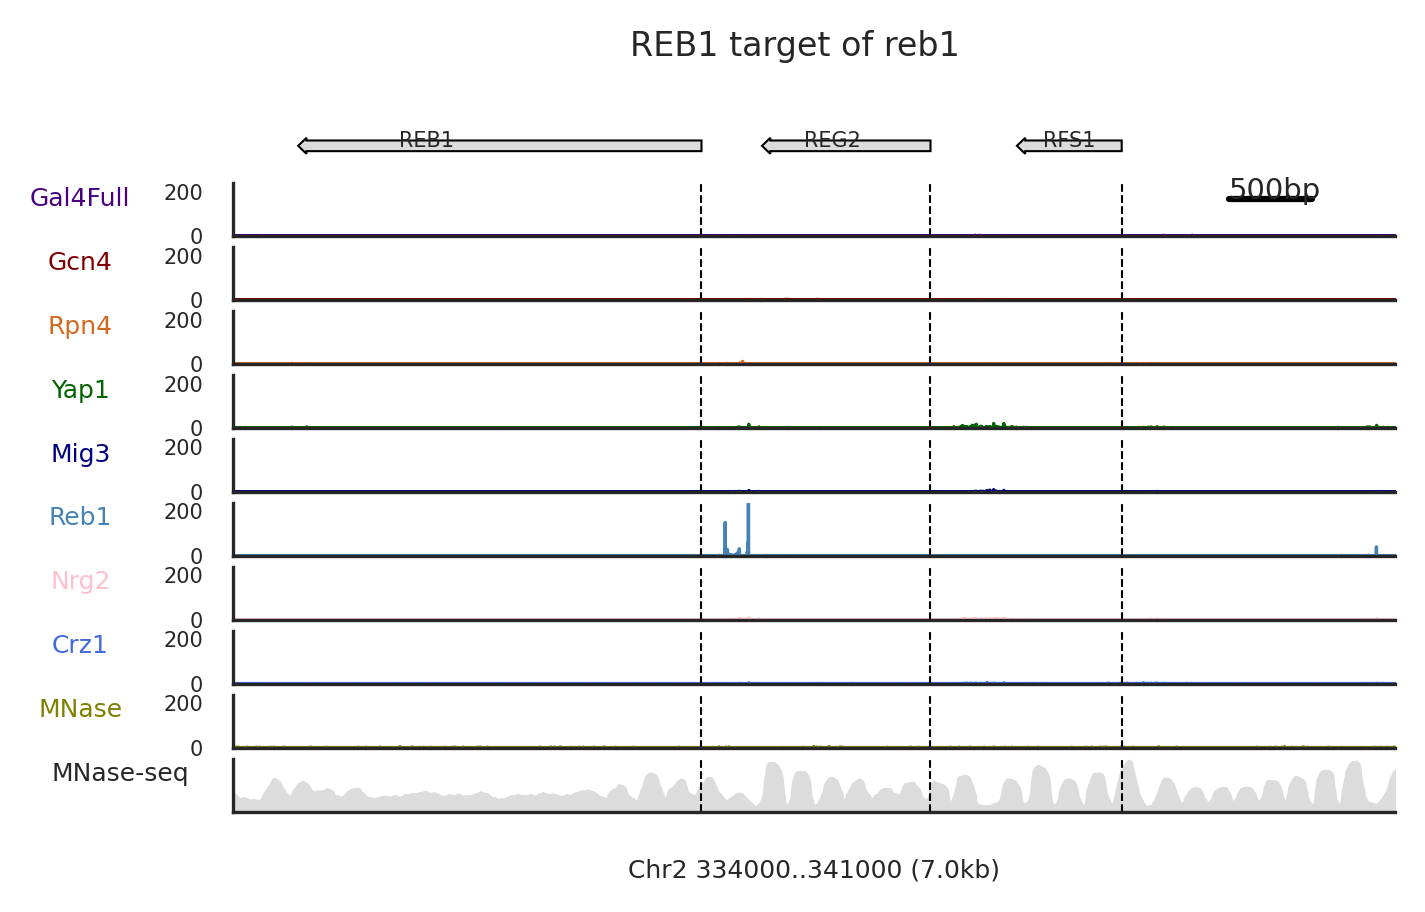

In [15]:
chrom = 2
startchr = 334000
stopchr = 341000
gcn4coords = (gp.query("chr_loc==@chrom & start>@startchr & stop<@stopchr & status=='Verified ORF'").loc[:, ['start', 'stop']].applymap(lambda x: int(x)) - startchr).clip(0)


tracks = norm_tracks.loc[chrom].apply(lambda x: x[startchr:stopchr])
fig, ax = plt.subplots(tracks.shape[0]+2,1, constrained_layout=False, sharex=True, sharey=False, dpi=150, figsize=(5,3))
fig.suptitle('REB1 target of reb1', size=8)

colors = ['indigo', 'maroon', 'chocolate', 'darkgreen', 'navy', 'steelblue', 'pink', 'royalblue', 'olive']
for tfi, axi, colori in zip(['Gal4Full_erv', 'Gcn4_lown', 'Rpn4','Yap1','Mig3','Reb1', 'Nrg2', 'Crz1', 'MNase'], ax[1:], colors):
    plot_vec = tracks.loc[tfi]
    axi.fill_between(np.arange(plot_vec.shape[0]), plot_vec,color=colori,lw=.8)
    sns.despine(ax=axi, top=True, right=True)
    axi.set_ylabel(tfi.split('_')[0], size=6, rotation=0, labelpad=20)
    axi.yaxis.label.set_color(colori)
    axi.set_xlim([-10,stopchr-startchr])
    axi.set_ylim([-5, max(tracks.apply(lambda x: max(x)))])
    axi.set_yticklabels(axi.get_yticklabels(), size=5)

ax[0].set_ylim([0, 100])
hw = 30
hl = 50
wd = 20
ya = 50
ts = 5
for i in range(gcn4coords.shape[0]):
    text = gcn4coords.index[i]
    draw_arrow(ax[0], gcn4coords.values[i], hw, hl, wd, ya, ts, text)
    for axi in ax[1:]:
        draw_line(axi, gcn4coords.values[i][0])


ax[0].set_yticklabels('')
sns.despine(ax=ax[0], top=True, right=True, bottom=True, left=True)


ax[-1].fill_between(range(stopchr-startchr), nucchr.loc[chrom].apply(lambda x: x[startchr:stopchr]).values[0], color='gainsboro')
ax[-1].set_yticklabels('')
ax[-1].set_ylabel('MNase-seq', size=6, rotation=0, labelpad=20)
ax[-1].set_xticklabels('')
sns.despine(ax=ax[-1], top=True, right=True, bottom=False)
fig.subplots_adjust(hspace=0.2)

y = max(tracks.apply(lambda x: max(x))) * 0.7
ax[1].plot([(stopchr-startchr)-1000,(stopchr-startchr)-500],[y,y], c='k')
ax[1].text((stopchr-startchr)-1000, y+2, '500bp', size=7)

ax[-1].set_xlabel('Chr{} {}..{} ({}kb)'.format(chrom, startchr, stopchr, (stopchr-startchr)/1000), size=6)
fig.savefig('figures/Supp/S1_4.pdf')

# Deletions OE strains tracks

In [16]:
norm_tracks = pd.read_parquet('data/s3_tracks_data.gz')

In [17]:
genes_needed =['YNL134C', 'MTH1', 'GAL7','STF2', 'LEU4', ]


/tmp/ipykernel_68112/1963639280.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1963639280.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1963639280.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1963639280.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1963639280.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


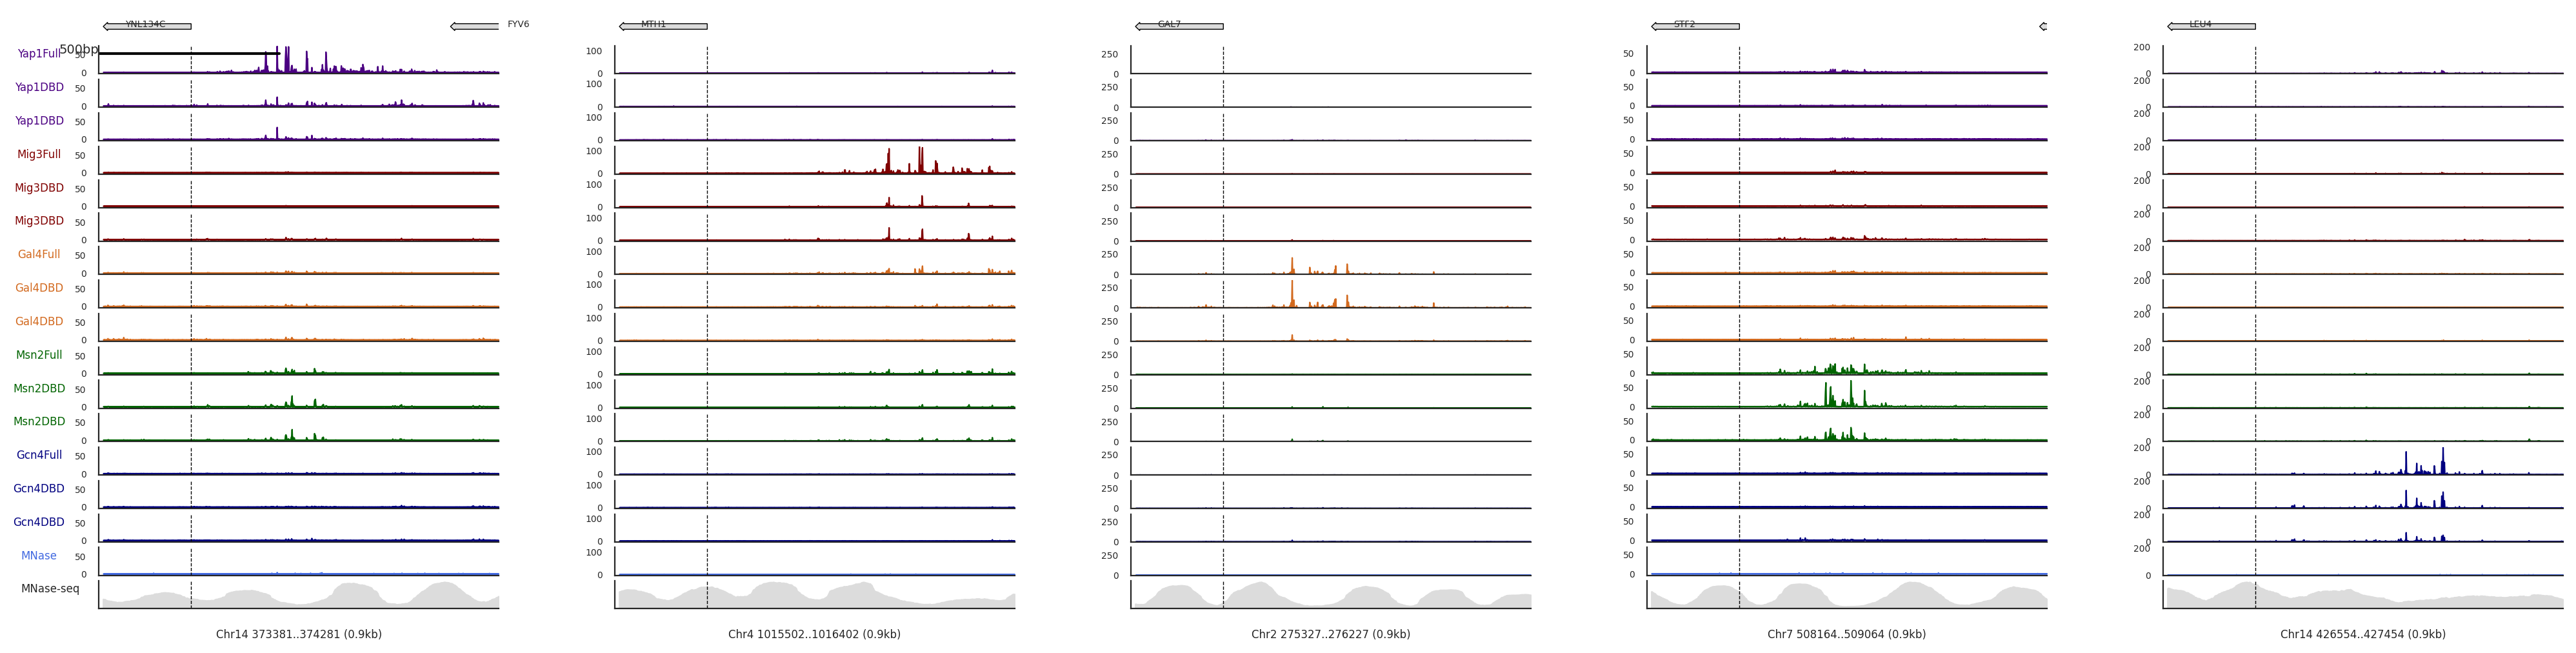

In [18]:
colors = ['indigo']*3 + ['maroon']*3 + ['chocolate']*3 + ['darkgreen']*3 + ['navy']*3 + ['royalblue']

inprom=700
ingene=200
fig = plt.figure(figsize=(20,6), constrained_layout=False)

subf = fig.subfigures(1, len(genes_needed))

for ngene, subi in zip(genes_needed, subf):

    chrom = int(gp.loc[ngene].chr_loc)
    coord = int(gp.loc[ngene].start)

    if (gp.loc[ngene].start - gp.loc[ngene].stop) < 0:

        startchr = coord-inprom
        stopchr = coord+ingene
    else:
        startchr = coord-ingene
        stopchr = coord+inprom

    genes = (gp.query("chr_loc==@chrom & start>@startchr & stop<@stopchr & status=='Verified ORF'").loc[:, ['start', 'stop']].applymap(lambda x: int(x)) - startchr).clip(0)

    tracks = norm_tracks.loc[chrom].apply(lambda x: x[startchr:stopchr])

    ax = subi.subplots(tracks.shape[0]+2,1, sharex=True)
    for tfi, axi, colori in zip(norm_tracks.columns, ax[1:], colors):
        plot_vec = tracks.loc[tfi]
        axi.fill_between(np.arange(plot_vec.shape[0]), plot_vec,color=colori,lw=.8)
        sns.despine(ax=axi, top=True, right=True)
        if ngene == genes_needed[0]:
            axi.set_ylabel(tfi.split('_')[0], size=6, rotation=0, labelpad=20)
            axi.yaxis.label.set_color(colori)
        axi.set_xlim([-10,stopchr-startchr])
        axi.set_ylim([-5, max(tracks.apply(lambda x: max(x)))])
        axi.set_yticklabels(axi.get_yticklabels(), size=5)

    ax[0].set_ylim([0, 100])
    hw = 30
    hl = 10
    wd = 20
    ya = 50
    ts = 5
    for i in range(genes.shape[0]):
        text = genes.index[i]
        draw_arrow(ax[0], genes.values[i], hw, hl, wd, ya, ts, text)
        for axi in ax[1:]:
            draw_line(axi, genes.values[i][0])


    ax[0].set_yticklabels('')
    sns.despine(ax=ax[0], top=True, right=True, bottom=True, left=True)


    ax[-1].fill_between(range(stopchr-startchr), nucchr.loc[chrom].apply(lambda x: x[startchr:stopchr]).values[0], color='gainsboro')
    ax[-1].set_yticklabels('')
    ax[-1].set_xticklabels('')
    sns.despine(ax=ax[-1], top=True, right=True, bottom=False)
    fig.subplots_adjust(hspace=0.2)
    if ngene == genes_needed[0]:
        ax[-1].set_ylabel('MNase-seq', size=6, rotation=0, labelpad=20)
        y = max(tracks.apply(lambda x: max(x))) * 0.7
        ax[1].plot([(stopchr-startchr)-1000,(stopchr-startchr)-500],[y,y], c='k')
        ax[1].text((stopchr-startchr)-1000, y+2, '500bp', size=7)

    ax[-1].set_xlabel('Chr{} {}..{} ({}kb)'.format(chrom, startchr, stopchr, (stopchr-startchr)/1000), size=6)
fig.savefig('figures/Supp/S3A.pdf')

In [19]:
genes_needed = ['SMC3', 'SLI1', 'RTT101', 'MRPL51', 'JEM1']

/tmp/ipykernel_68112/1173838540.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1173838540.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1173838540.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1173838540.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


/tmp/ipykernel_68112/1173838540.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axi.set_yticklabels(axi.get_yticklabels(), size=5)


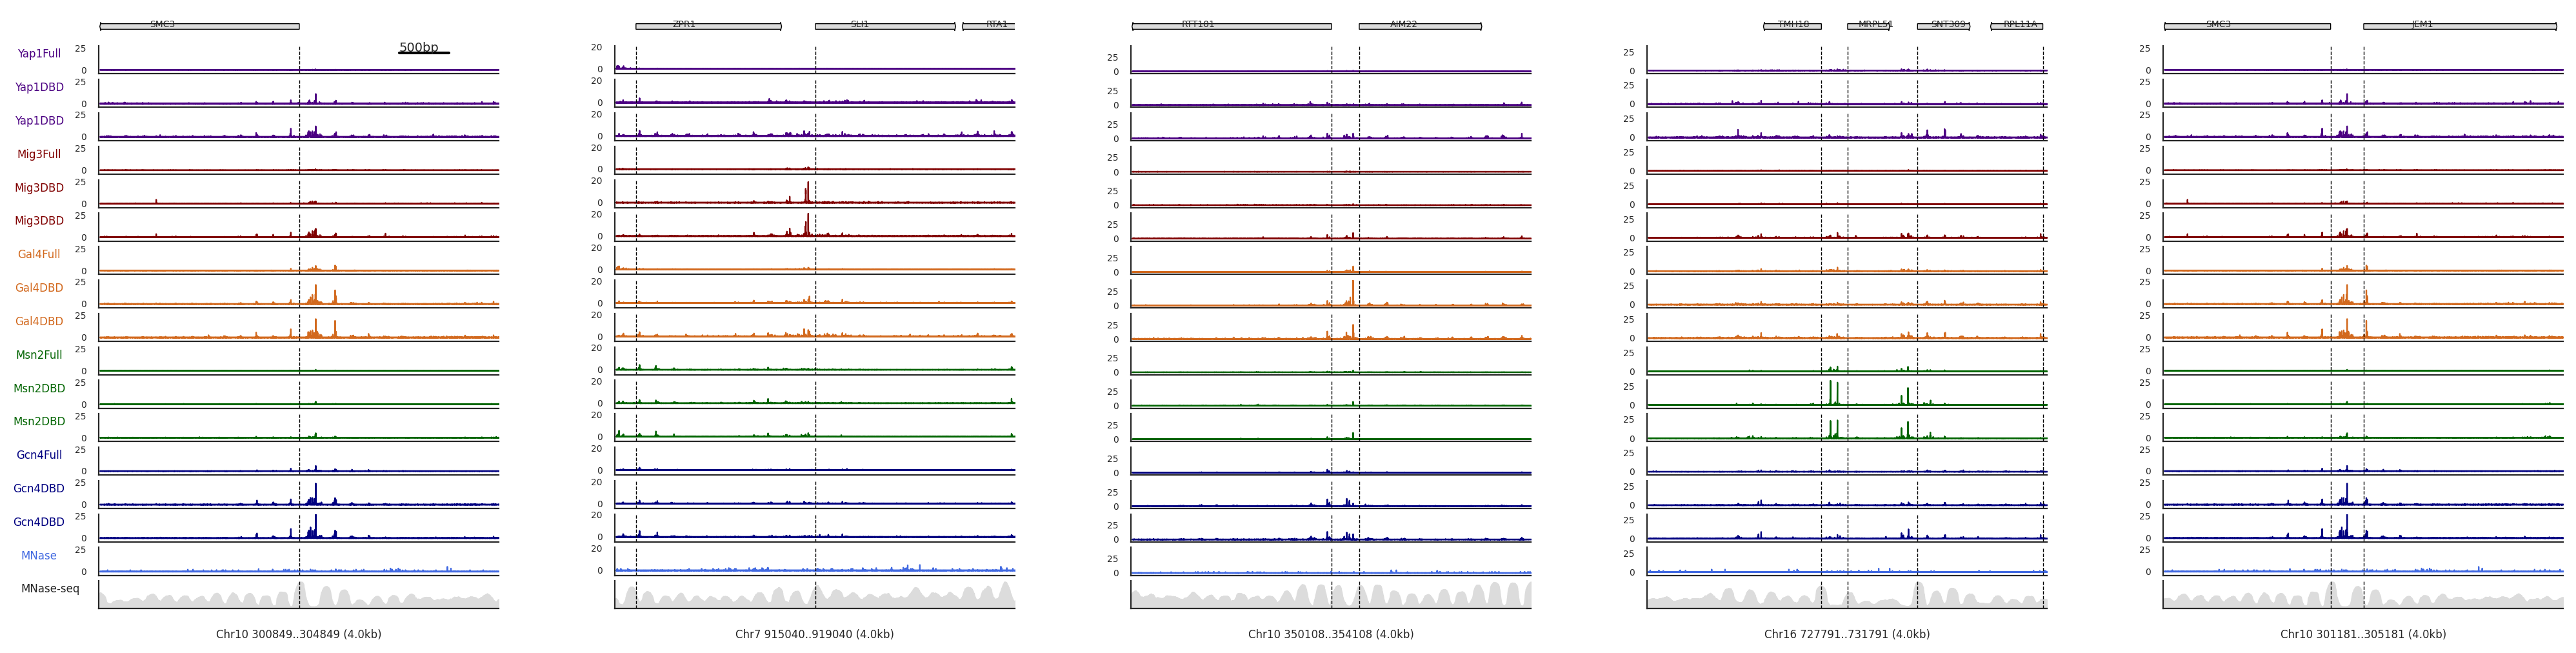

In [20]:
colors = ['indigo']*3 + ['maroon']*3 + ['chocolate']*3 + ['darkgreen']*3 + ['navy']*3 + ['royalblue']

inprom=2000
ingene=2000
fig = plt.figure(figsize=(20,6), constrained_layout=False)

subf = fig.subfigures(1, len(genes_needed))

for ngene, subi in zip(genes_needed, subf):

    chrom = int(gp.loc[ngene].chr_loc)
    coord = int(gp.loc[ngene].start)

    if (gp.loc[ngene].start - gp.loc[ngene].stop) < 0:

        startchr = coord-inprom
        stopchr = coord+ingene
    else:
        startchr = coord-ingene
        stopchr = coord+inprom

    genes = (gp.query("chr_loc==@chrom & start>@startchr & stop<@stopchr & status=='Verified ORF'").loc[:, ['start', 'stop']].applymap(lambda x: int(x)) - startchr).clip(0)

    tracks = norm_tracks.loc[chrom].apply(lambda x: x[startchr:stopchr])

    ax = subi.subplots(tracks.shape[0]+2,1, sharex=True)
    for tfi, axi, colori in zip(norm_tracks.columns, ax[1:], colors):
        plot_vec = tracks.loc[tfi]
        axi.fill_between(np.arange(plot_vec.shape[0]), plot_vec,color=colori,lw=.8)
        sns.despine(ax=axi, top=True, right=True)
        if ngene == genes_needed[0]:
            axi.set_ylabel(tfi.split('_')[0], size=6, rotation=0, labelpad=20)
            axi.yaxis.label.set_color(colori)
        axi.set_xlim([-10,stopchr-startchr])
        axi.set_ylim([-5, max(tracks.apply(lambda x: max(x)))])
        axi.set_yticklabels(axi.get_yticklabels(), size=5)

    ax[0].set_ylim([0, 100])
    hw = 30
    hl = 10
    wd = 20
    ya = 50
    ts = 5
    for i in range(genes.shape[0]):
        text = genes.index[i]
        draw_arrow(ax[0], genes.values[i], hw, hl, wd, ya, ts, text)
        for axi in ax[1:]:
            draw_line(axi, genes.values[i][0])


    ax[0].set_yticklabels('')
    sns.despine(ax=ax[0], top=True, right=True, bottom=True, left=True)


    ax[-1].fill_between(range(stopchr-startchr), nucchr.loc[chrom].apply(lambda x: x[startchr:stopchr]).values[0], color='gainsboro')
    ax[-1].set_yticklabels('')
    ax[-1].set_xticklabels('')
    sns.despine(ax=ax[-1], top=True, right=True, bottom=False)
    fig.subplots_adjust(hspace=0.2)
    if ngene == genes_needed[0]:
        ax[-1].set_ylabel('MNase-seq', size=6, rotation=0, labelpad=20)
        y = max(tracks.apply(lambda x: max(x))) * 0.7
        ax[1].plot([(stopchr-startchr)-1000,(stopchr-startchr)-500],[y,y], c='k')
        ax[1].text((stopchr-startchr)-1000, y+2, '500bp', size=7)

    ax[-1].set_xlabel('Chr{} {}..{} ({}kb)'.format(chrom, startchr, stopchr, (stopchr-startchr)/1000), size=6)
fig.savefig('figures/Supp/S3B.pdf')

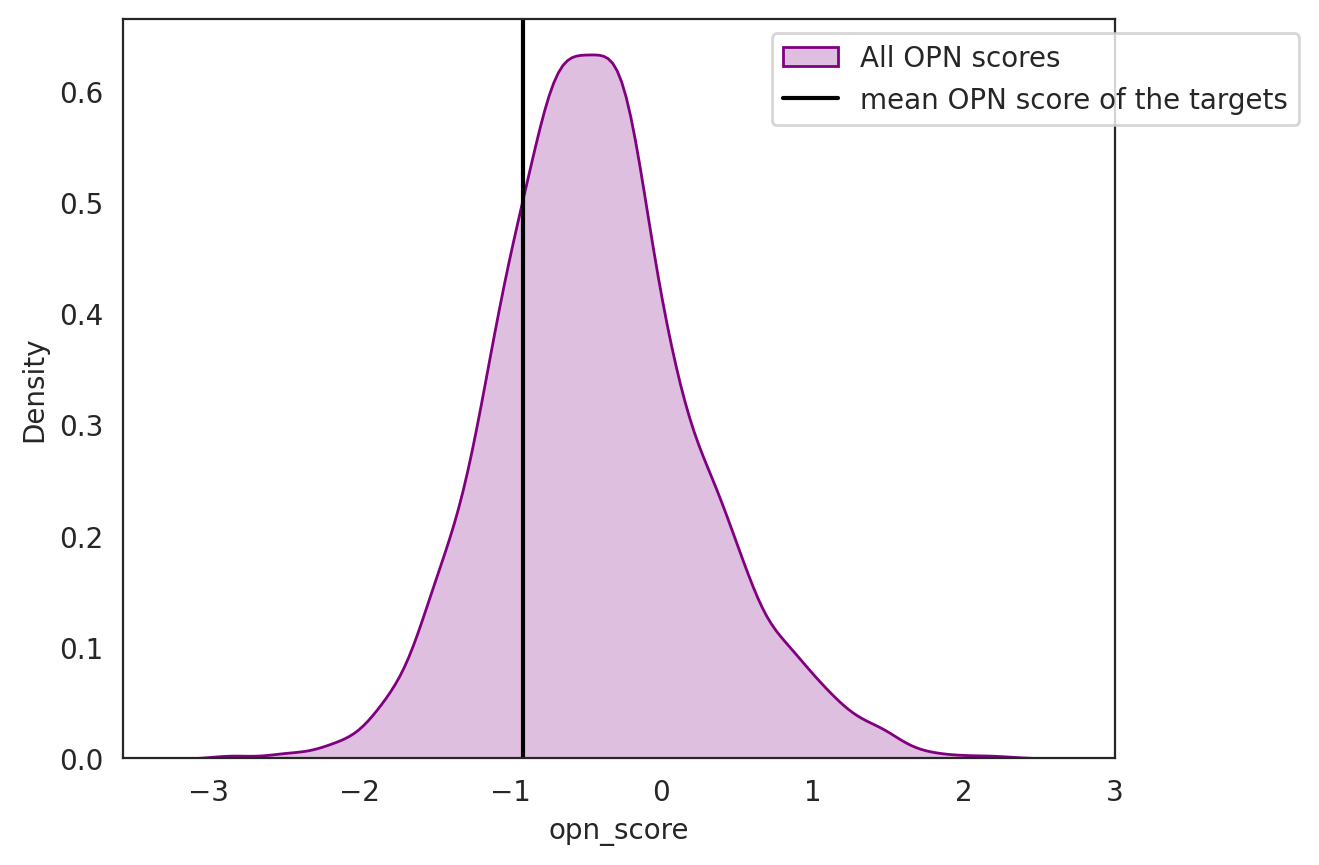

In [21]:
fig, ax = plt.subplots(1)
sns.kdeplot(opn.iloc[:, 0], ax=ax, color='purple', fill=True, label='All OPN scores')
ax.axvline(opn.loc[genes_needed, 'opn_score'].mean(), c='k', label='mean OPN score of the targets')
ax.legend(bbox_to_anchor=(1.2,1))
fig.savefig('figures/Supp/S3B_2.pdf')

# Fig4 targets big heatmap

In [22]:
tfs_binding_deletions_tef = data_waro.filter(regex=''.join(['^{}|'.format(tf) for tf in TFS])[:-1]).filter(regex='deletions')
tfs_binding_deletions_tef = pd.concat([tfs_binding_deletions_tef.filter(regex='{}'.format(i)) for i in ['Full', 'Gal4AD', 'Gcn4AD']], axis=1)
ordered_df = pd.concat([tfs_binding_deletions_tef.filter(regex='^{}'.format(i)) for i in TFS], axis=1)
ordered_df.columns = ['_'.join(k.split('_')[0:2]) for k in ordered_df.columns.values]
allts = fg.get_targets_df(ordered_df, 3, 'all', '', '')


In [23]:
dbd_targets = allts.filter(regex='DBD', axis=0)
dfl = []
for i in ['Msn2', 'Gal4', 'Gcn4', 'Yap1', 'Mig3']:
    curr_dat = allts.filter(regex='^{}'.format(i), axis=0)
    curr_dat = curr_dat.applymap(lambda x: list(set(x).difference(curr_dat.iloc[0].values[0]))).iloc[1:]
    dfl.append(curr_dat)
unique_ts = pd.concat(dfl, axis=0)

unique_ts = pd.concat([unique_ts, allts.filter(regex='Full', axis=0)] ,axis=0).sort_index(ascending=False).drop(['Rpn4Full_dRpn4',
                                                                                                                'Gln3Full_dGln3'])

In [24]:
unique_ts = allts.sort_index(ascending=False).drop(['Rpn4Full_dRpn4','Gln3Full_dGln3','Gln3DBD_Gcn4AD','Gln3DBD_Gal4AD','Rpn4DBD_Gcn4AD','Rpn4DBD_Gal4AD'])

In [25]:
norm_tracks = norm_tracks.sort_index(axis=1, ascending=False).drop('MNase', axis=1)

In [26]:
norm_tracks.columns = list(unique_ts.index)

In [27]:
big_d = dict()
for tfi in unique_ts.index:
    small_df = []
    for ngene in unique_ts.loc[tfi, 'all'][:30]:

        chrom = int(gp.loc[ngene].chr_loc)
        coord = int(gp.loc[ngene].start)

        if (gp.loc[ngene].start - gp.loc[ngene].stop) < 0:

            startchr = coord-inprom
            stopchr = coord+ingene
            genes = (gp.query("chr_loc==@chrom & start>@startchr & stop<@stopchr & status=='Verified ORF'").loc[:, ['start', 'stop']].applymap(lambda x: int(x)) - startchr).clip(0)
            small_df.append(norm_tracks.loc[chrom].apply(lambda x: x[startchr:stopchr]))
        else:
            startchr = coord-ingene
            stopchr = coord+inprom
            genes = (gp.query("chr_loc==@chrom & start>@startchr & stop<@stopchr & status=='Verified ORF'").loc[:, ['start', 'stop']].applymap(lambda x: int(x)) - startchr).clip(0)
            small_df.append(norm_tracks.loc[chrom].apply(lambda x: x[startchr:stopchr][::-1]))
        

    big_d[tfi] = small_df
    

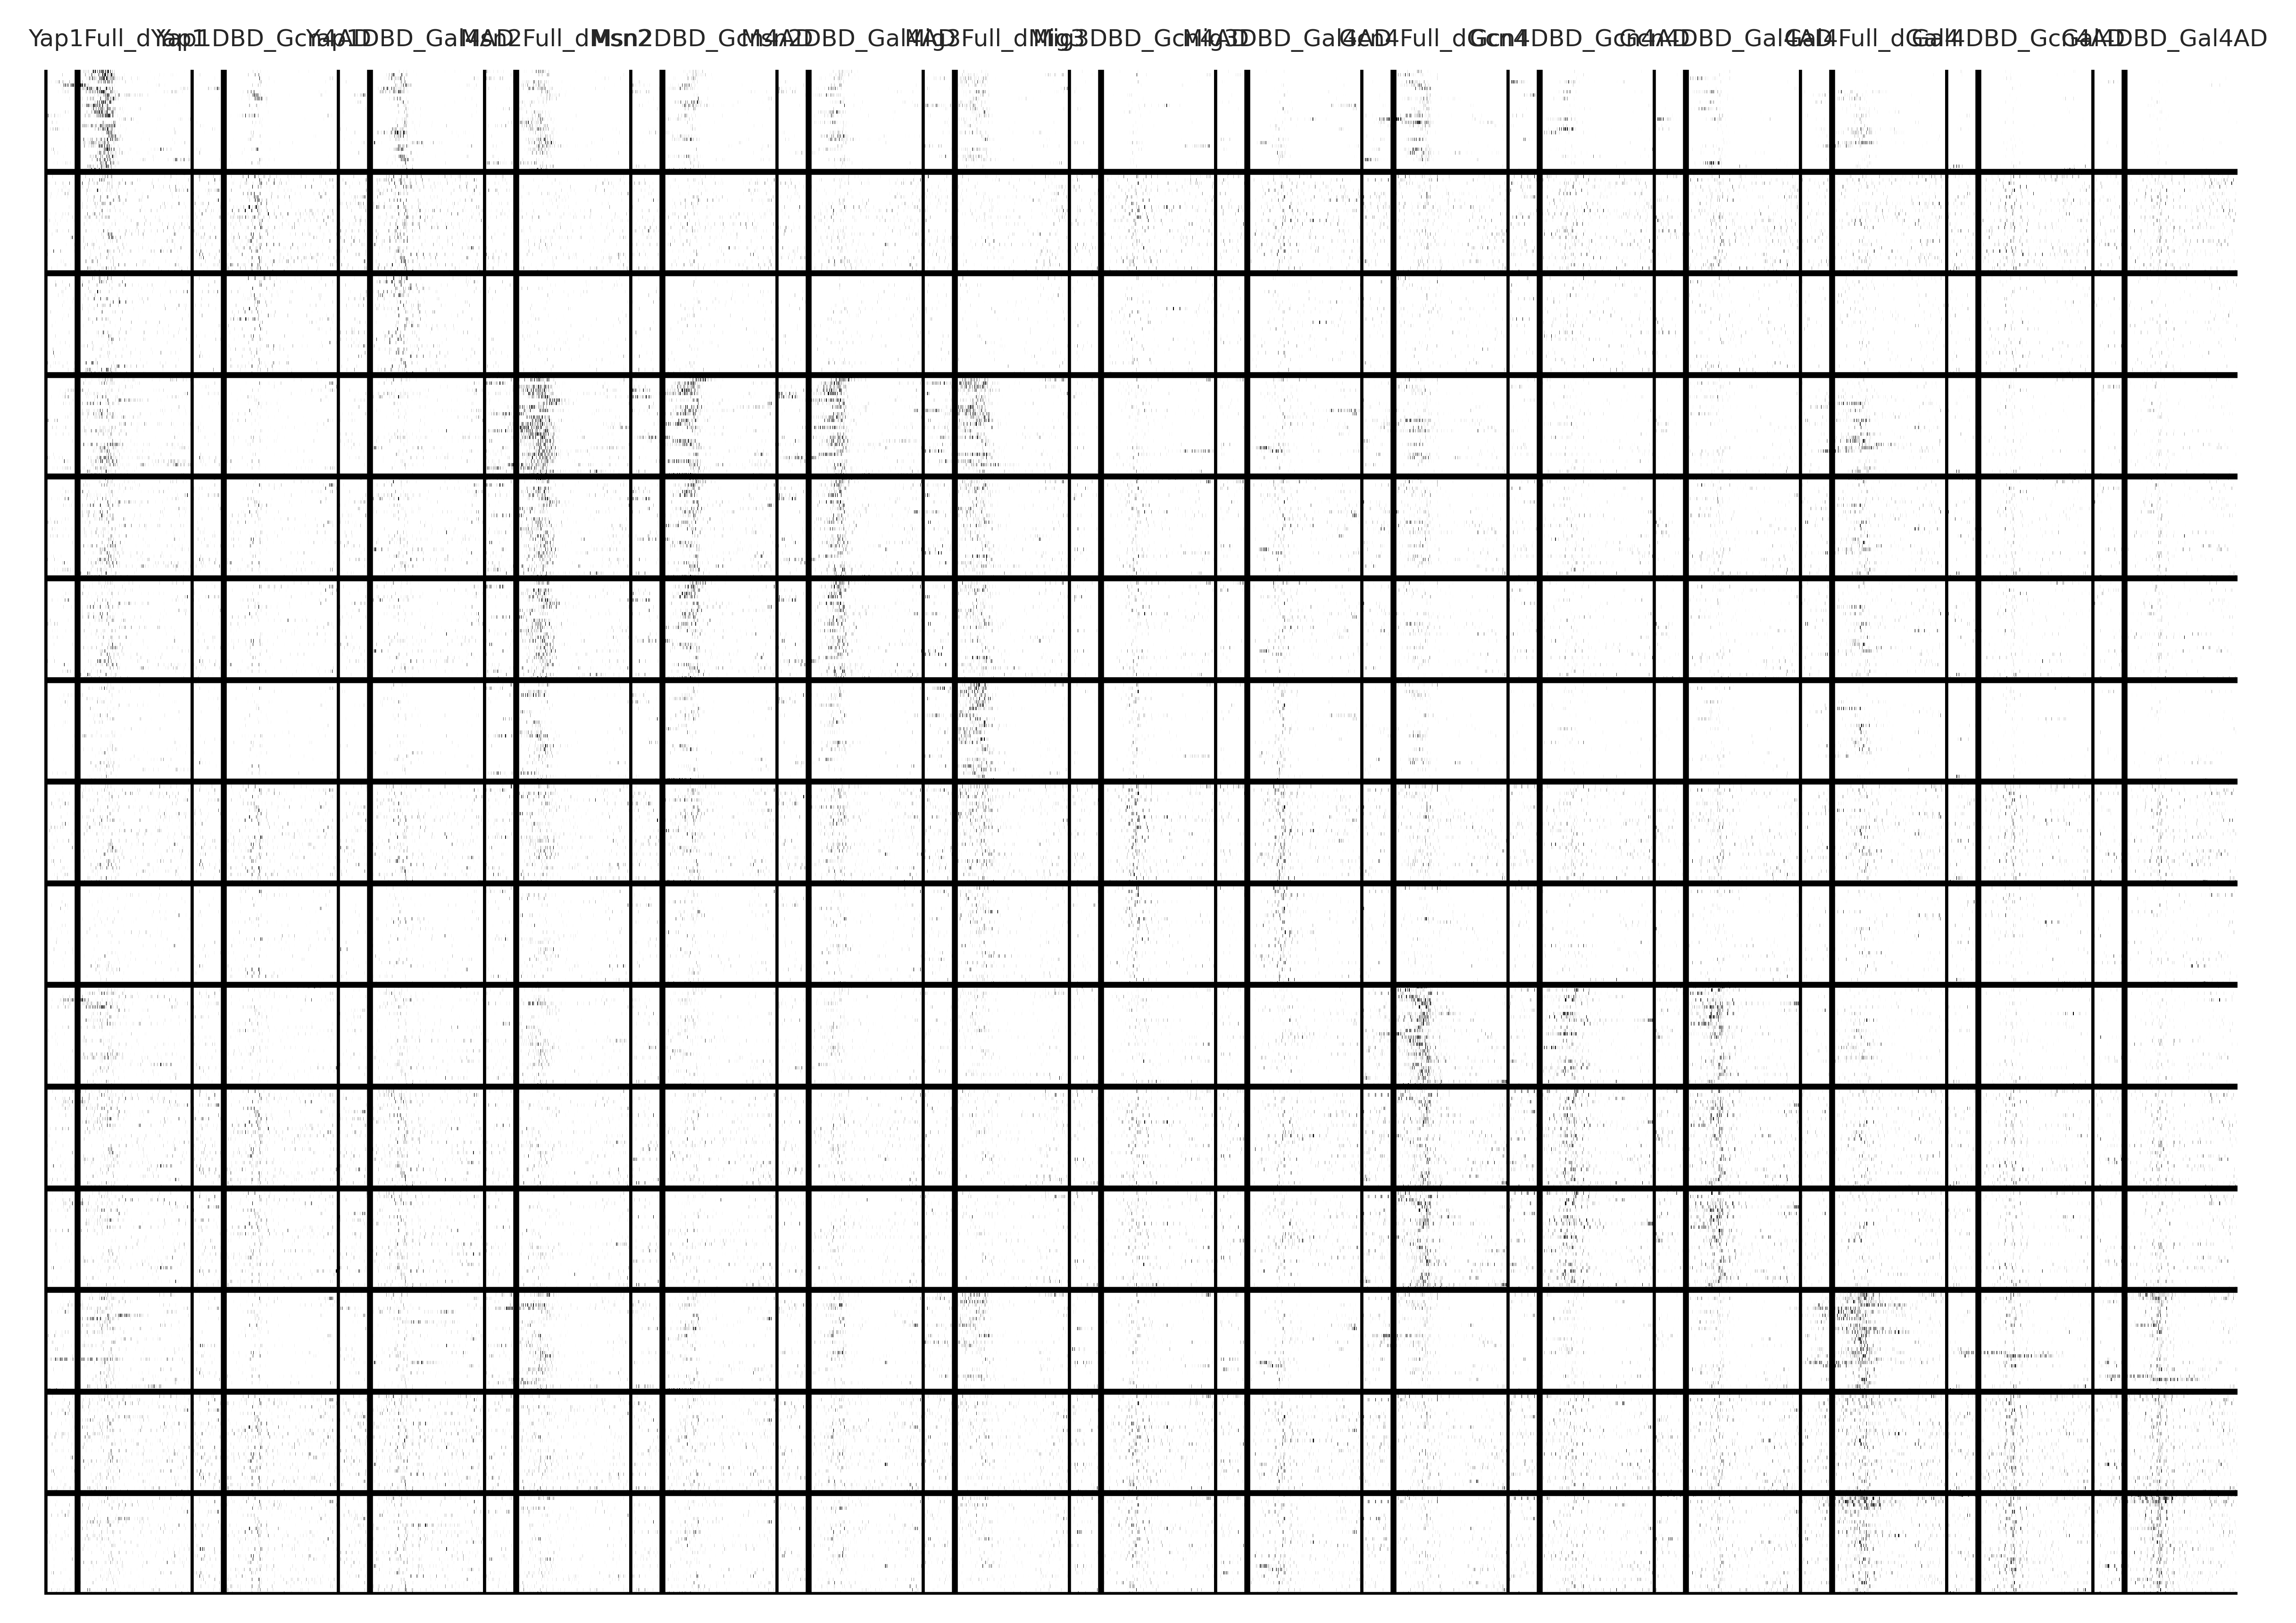

In [28]:
fig, ax = plt.subplots(1,unique_ts.shape[0], figsize=(10,7), dpi=300)


for tfi, axi in zip(unique_ts.index, ax):
    trial = pd.DataFrame(pd.concat(big_d[tfi], axis=1).T.melt().drop('variable', axis=1).to_dict()['value']).T
    sns.heatmap(trial, vmax=6, vmin=0, cmap='binary', ax=axi, cbar=False, rasterized=True)
    axi.set_xlabel('')
    axi.set_ylabel('')
    axi.set_xticklabels('')
    axi.set_yticklabels('')
    axi.set_title(tfi, size=6)
    for enumi, i in enumerate(range(30, unique_ts.shape[0]*31, 30)):
        axi.axhline(i, c='k')
    axi.axvline(0, c='k')
    axi.axvline(900, c='k')
fig.subplots_adjust(wspace=0)

fig.savefig('figures/Supp/S4.pdf')